In [1]:
from chart_agent import chart_node
from search_agent import search_node
from langgraph.graph import StateGraph,START,END
from state import AgentState
from langchain_core.messages import HumanMessage

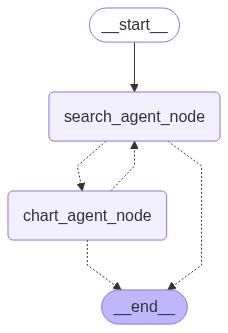

In [3]:
graph= StateGraph(AgentState)
graph.add_node("search_agent_node",search_node)
graph.add_node("chart_agent_node",chart_node)


graph.add_edge(START,"search_agent_node")
compiledgraph=graph.compile()
compiledgraph

in search node state : messages=[HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={})] sender='user'
{'messages': [HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='ea2cd2fc-4640-484e-8ba5-a756905b26ed'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yYiaPCXUoZVD8e53mb1IuwkX', 'function': {'arguments': '{"query":"UK GDP data past 5 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 132, 'total_tokens': 157, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_to

Python REPL can execute arbitrary code. Use with caution.


in code tool
messages
----
sender
----


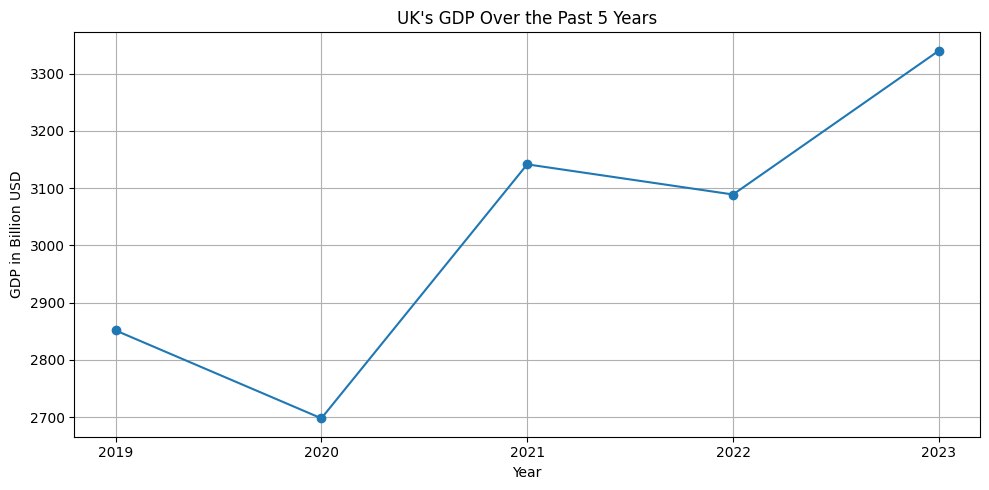

In [4]:
events = compiledgraph.invoke(
    {
        "messages": [
            HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.")
        ],
        "sender":"user"
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 5}
)
for s in events:
    print(s)
    print("----")